In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from utils import get_img_obj_points
from utils import cal_undistort
from utils import *
from PIL import Image
from PIL import ImageEnhance

In [2]:
img = mpimg.imread('C:\\Users\\julym\\Desktop\\data\\suspicious\\20190122162108.jpg')
print(img.shape)
height,width = img.shape[0],img.shape[1]

(465, 480, 3)


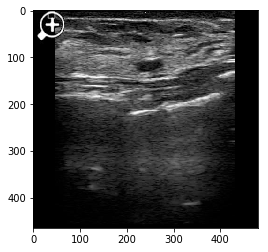

In [3]:
plt.imshow(img)
plt.show()

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:\\Users\\julym\\Desktop\\data\\suspicious\\20190122162108.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

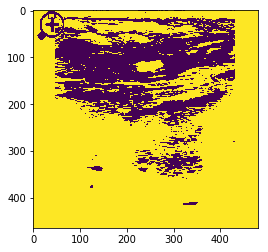

66.0
9


In [5]:
plt.imshow(thresh)
plt.show()
print(ret)
print(cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

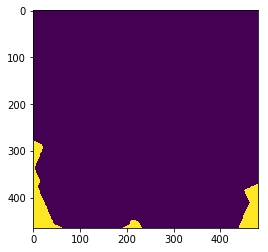

In [6]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg)
plt.show()
# unknown = cv2.subtract(sure_bg,sure_fg)

In [7]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_bg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[sure_fg==255] = 0

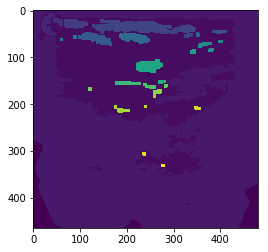

In [8]:
plt.imshow(markers)
plt.show()

In [9]:
markers = cv2.watershed(img,markers)
img[markers == 1] = [255,0,0]

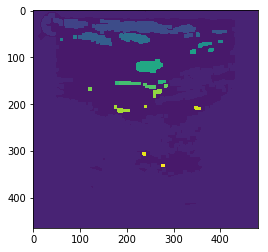

In [10]:
plt.imshow(markers)
plt.show()

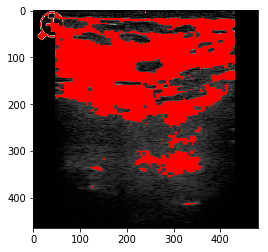

In [11]:
plt.imshow(img)
plt.show()

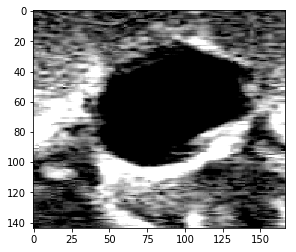

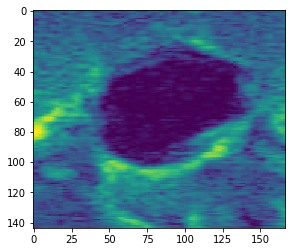

In [69]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np
from skimage.segmentation import mark_boundaries
from skimage.segmentation import slic
from skimage.util import img_as_float
from PIL import Image
from PIL import ImageEnhance
import matplotlib.pyplot as plt
%matplotlib inline
image_read = cv2.imread('20190128155138.jpg')
image = img_as_float(image_read)
enh_con = ImageEnhance.Contrast(Image.open('20190128155138.jpg'))
contrast = 3
image_contrasted = enh_con.enhance(contrast)
# plt.imshow(image)
# plt.show()
# # loop over the number of segments
# for numSegments in (100, 200, 300):
#     segments = slic(image, n_segments=numSegments, sigma=5)
#     plt.imshow(mark_boundaries(image, segments))
#     plt.show()
plt.imshow(image_contrasted)
plt.show()
img_gray = cv2.cvtColor(image_read, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.show()

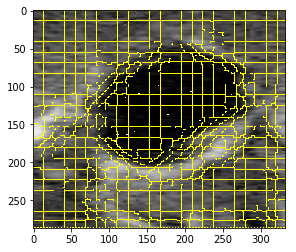

(287, 333, 3)


In [70]:
segments = slic(image, n_segments=500, sigma=5)
segments_ids = np.unique(segments)
out_image = mark_boundaries(image, segments, mode='subpixel')

plt.imshow((out_image * 255).astype(np.uint8))
plt.show()
print(out_image.shape)


In [71]:
# for (i, segVal) in enumerate(np.unique(segments)):
#     print("[x] %d" % (i))
#     mask = np.zeros(image.shape[:2], dtype="uint8")
#     print(mask.shape)
#     mask[segments == segVal] = 255
#     plt.imshow(mask)
#     plt.imshow(cv2.bitwise_and(image, image, mask=mask))
#     plt.show()

In [72]:
imp = image.copy()
for (i, segVal) in enumerate(np.unique(segments)):
    a = np.mean(imp[segments == segVal])
    imp[segments == segVal] = a
#     plt.imshow(imp)
#     plt.show()

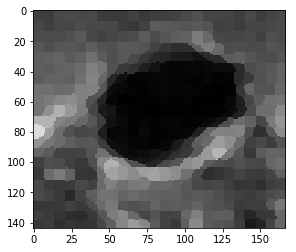

In [73]:
plt.imshow(imp)
plt.show()

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

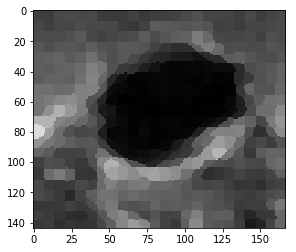

In [75]:
imgplot = plt.imshow(imp)

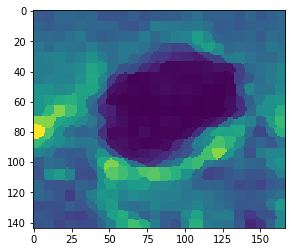

In [76]:
lum_img = imp[:,:,0]
plt.imshow(lum_img)

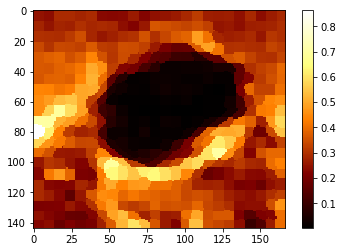

In [80]:
plt.imshow(lum_img, cmap="afmhot")
plt.colorbar()